In [ ]:
pip install opendatasets

In [ ]:
pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
import opendatasets as od
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [ ]:
od.download("https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omarali13
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset


100%|██████████| 121M/121M [00:07<00:00, 17.3MB/s]


In [ ]:
TRAIN_DIR = '/content/face-expression-recognition-dataset/images/train'
TEST_DIR = '/content/face-expression-recognition-dataset/images/validation'

In [ ]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print(train)

angry completed
disgust completed
fear completed
sad completed
neutral completed
surprise completed
happy completed
                                                   image  label
0      /content/face-expression-recognition-dataset/i...  angry
1      /content/face-expression-recognition-dataset/i...  angry
2      /content/face-expression-recognition-dataset/i...  angry
3      /content/face-expression-recognition-dataset/i...  angry
4      /content/face-expression-recognition-dataset/i...  angry
...                                                  ...    ...
28816  /content/face-expression-recognition-dataset/i...  happy
28817  /content/face-expression-recognition-dataset/i...  happy
28818  /content/face-expression-recognition-dataset/i...  happy
28819  /content/face-expression-recognition-dataset/i...  happy
28820  /content/face-expression-recognition-dataset/i...  happy

[28821 rows x 2 columns]


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
print(test)

angry completed
disgust completed
fear completed
sad completed
neutral completed
surprise completed
happy completed
                                                  image  label
0     /content/face-expression-recognition-dataset/i...  angry
1     /content/face-expression-recognition-dataset/i...  angry
2     /content/face-expression-recognition-dataset/i...  angry
3     /content/face-expression-recognition-dataset/i...  angry
4     /content/face-expression-recognition-dataset/i...  angry
...                                                 ...    ...
7061  /content/face-expression-recognition-dataset/i...  happy
7062  /content/face-expression-recognition-dataset/i...  happy
7063  /content/face-expression-recognition-dataset/i...  happy
7064  /content/face-expression-recognition-dataset/i...  happy
7065  /content/face-expression-recognition-dataset/i...  happy

[7066 rows x 2 columns]


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
# displaying a progress bar
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [ ]:
# Extraction
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


  0%|          | 0/7066 [00:00<?, ?it/s]

In [ ]:
# Normalization
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
# Building the Neural Network Model
# Sequential model
model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Flattening
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

# Model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the Model
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.2308 - loss: 1.8402 - val_accuracy: 0.2587 - val_loss: 1.7978
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.2494 - loss: 1.8020 - val_accuracy: 0.3024 - val_loss: 1.7068
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.2915 - loss: 1.7247 - val_accuracy: 0.3681 - val_loss: 1.6059
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.3691 - loss: 1.5997 - val_accuracy: 0.4625 - val_loss: 1.4186
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.4222 - loss: 1.4863 - val_accuracy: 0.4919 - val_loss: 1.3303
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.4469 - loss: 1.4275 - val_accuracy: 0.5119 - val_loss: 1.2853
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.4685 - loss: 1.3789 - val_accuracy: 0.5185 - val_loss: 1.2607
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.4859 - loss: 

In [ ]:
# Saving the Model
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [ ]:
# Loading the Model and Making Predictions
from keras.models import model_from_json
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [ ]:
# Making Predictions on Test Images
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [ ]:
image = '/content/face-expression-recognition-dataset/images/images/train/sad/10128.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is  sad


In [ ]:
image = '/content/face-expression-recognition-dataset/images/images/train/sad/10133.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
model prediction is  neutral


In [ ]:
image = '/content/face-expression-recognition-dataset/images/images/train/happy/10042.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
model prediction is  happy


In [ ]:
image = '/content/face-expression-recognition-dataset/images/images/train/fear/10090.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  fear


In [ ]:
# Visualizing Predictions
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
model prediction is  sad


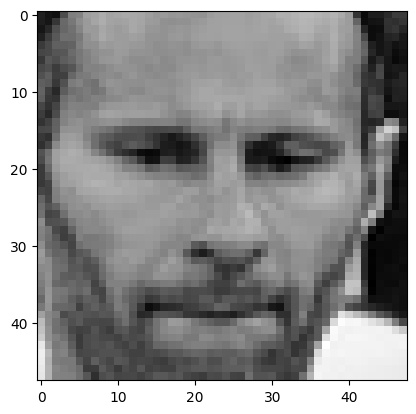

In [ ]:
image = '/content/face-expression-recognition-dataset/images/images/train/sad/10482.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

original image is of Angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
model prediction is  angry


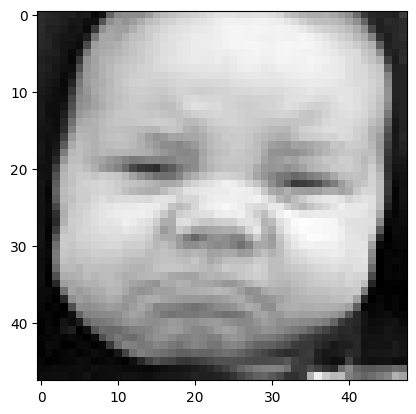

In [ ]:
image = '/content/face-expression-recognition-dataset/images/images/train/angry/10251.jpg'
print("original image is of Angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

original image is of digust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
model prediction is  disgust


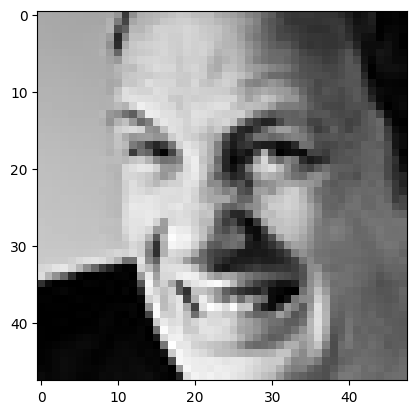

In [43]:
image = '/content/face-expression-recognition-dataset/images/train/disgust/10316.jpg'
print("original image is of digust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

original image is of digust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
model prediction is  sad


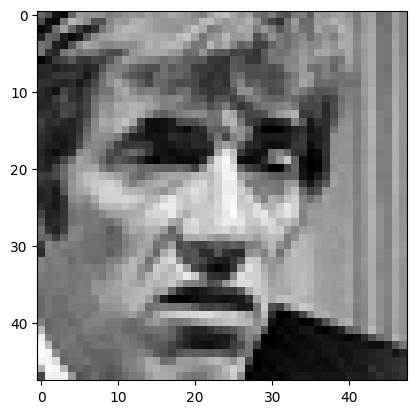

In [42]:
image = '/content/face-expression-recognition-dataset/images/train/disgust/11873.jpg'
print("original image is of digust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')